In [1]:
# %matplotlib notebook
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

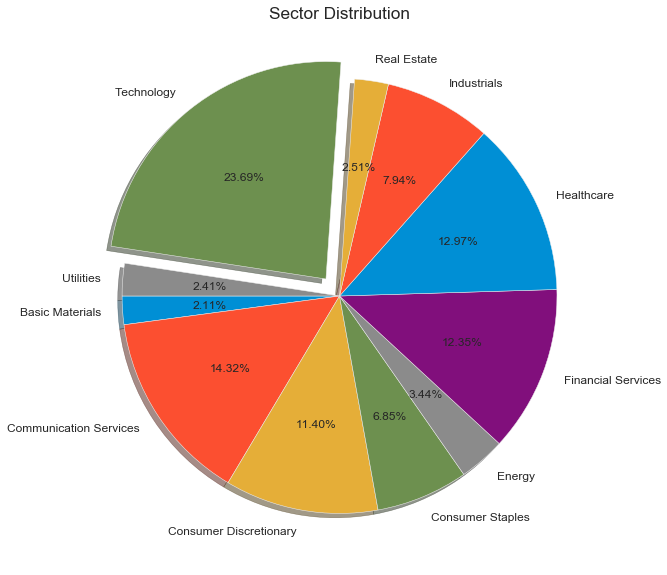

In [2]:
# Getting the data
companies_df = pd.read_csv("sp500/sp500_companies.csv")
sector_distribution = companies_df.groupby("Sector")["Marketcap"].sum()
sector_distribution

# Creat the chart
plt.rc('font', size=12)  
explode = (0,0,0,0,0,0,0,0,0,0.1,0)
plt.figure(figsize=(20, 12.36))
sector_distribution.plot(kind = "pie",explode=explode, shadow=True,startangle=180,autopct="%1.2f%%",figsize=(10,10))
plt.axis("off")

# Set appearance
plt.title("Sector Distribution")
plt.savefig("Sector Distribution.png")

plt.show()


### Out put data from yahoo finance API

Set up four crash periods in the last ten years.<br/>
Need to change the crash name and period manually.<br/>
The charts will be saved where the .ipynb file is, every time when you run the code.<br/>
Need to move them to the folder I want.<br/>

In [3]:
# Stock_Market_Selloff - 2015,8,18 - 2015,11,3
# Bitcoin_Crash - 2018,9,20 - 2019,4,23
# Covid_19  - 2020,2,20 - 2020,8,18
# Russian_Invasion_of_Ukraine - 2022,2,10 - 2022,3,30

# Set up crash name and periods
Period = "Russian_vs_Ukraine"
start_date = datetime(2022,2,10).date()
end_date = datetime(2022,3,30).date()

# The sectors we'll use for this analysis
sector_list = ['^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["Financials","Consumer Discretionary","Consumer Staples","Health","Industrials","Information Tech","Materials","Real Estate","Tele Services","Utilities","Energy"]

# sector_list = ['^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
prerformance = ['^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]

for stock in sector_list: 
    prerformance[sector_list.index(stock)] = yf.download(stock, start_date, end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


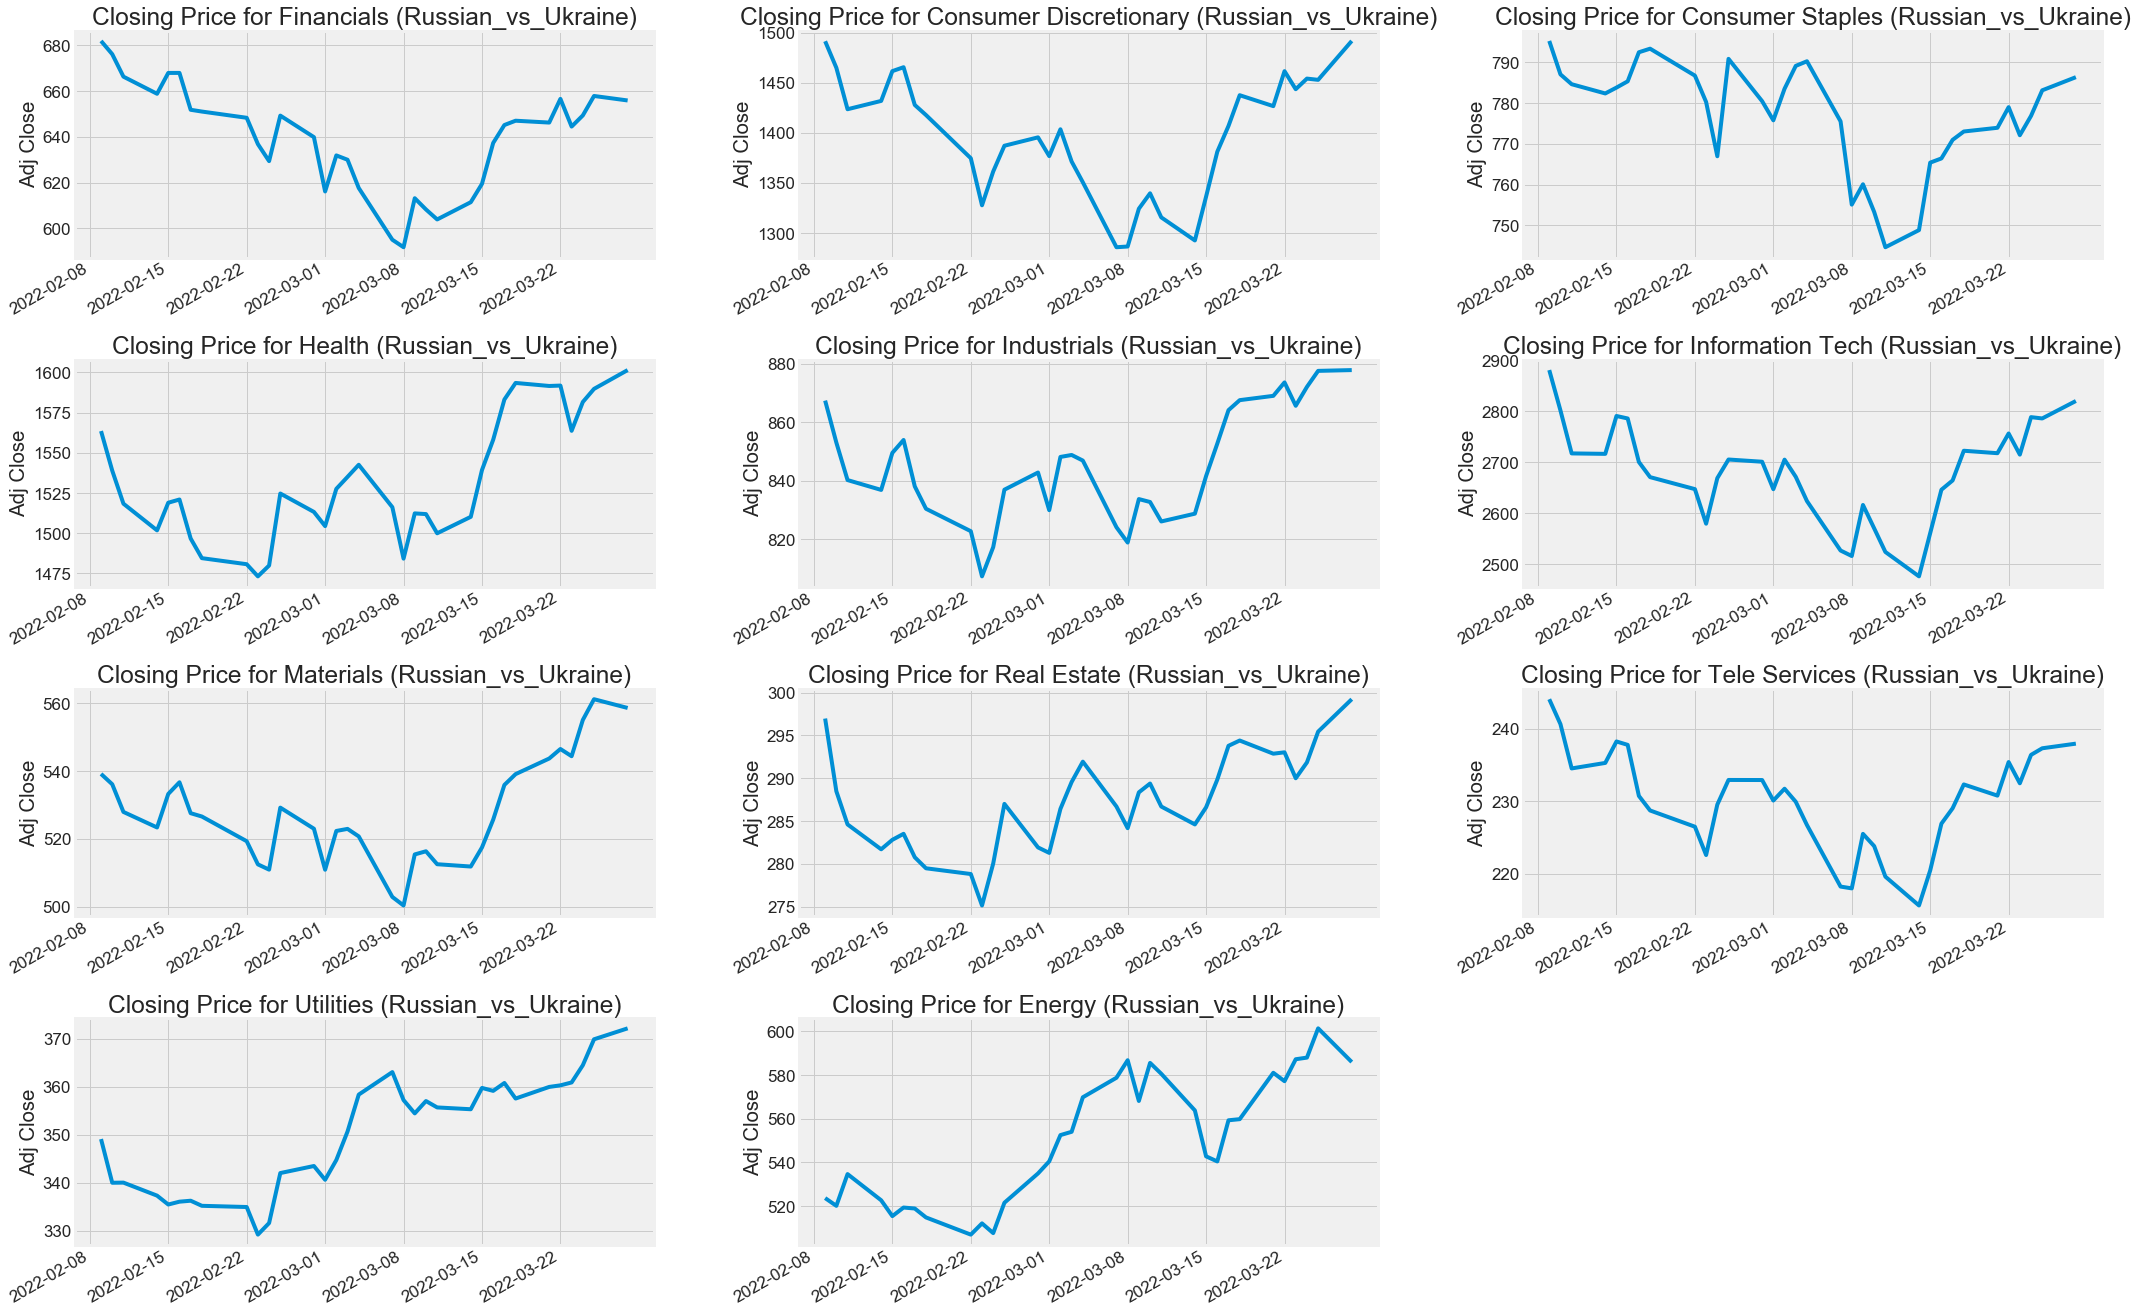

In [4]:
# Set layout for the plot
plt.figure(figsize=(30, 18.54))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.rc('font', size=17)  

# Create a subplots
for i, sector in enumerate(sector_list, 1):
    plt.subplot(4, 3, i)
    prerformance[i-1]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price for {sector_name[i - 1]} ({Period})")
    plt.tight_layout()
plt.savefig(f"Adj Close Change by Sectors ({Period}).png")


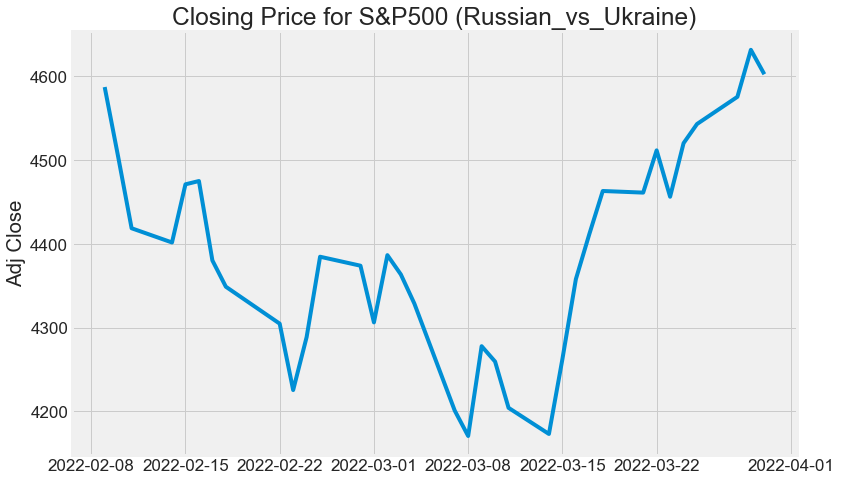

In [5]:
# Get 'Adj Close' on total S&P 500 from yahoo finance
SP500_df = pd.DataFrame(DataReader('^GSPC', 'yahoo', start_date, end_date)['Adj Close'])

# Set layout for the plot & reate a plot
plt.figure(figsize=(12, 7))
plt.plot(SP500_df.index,SP500_df['Adj Close'])
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price for S&P500 ({Period})")
plt.tight_layout()
plt.savefig(f"Adj Close Change for S&P500 ({Period}).png")

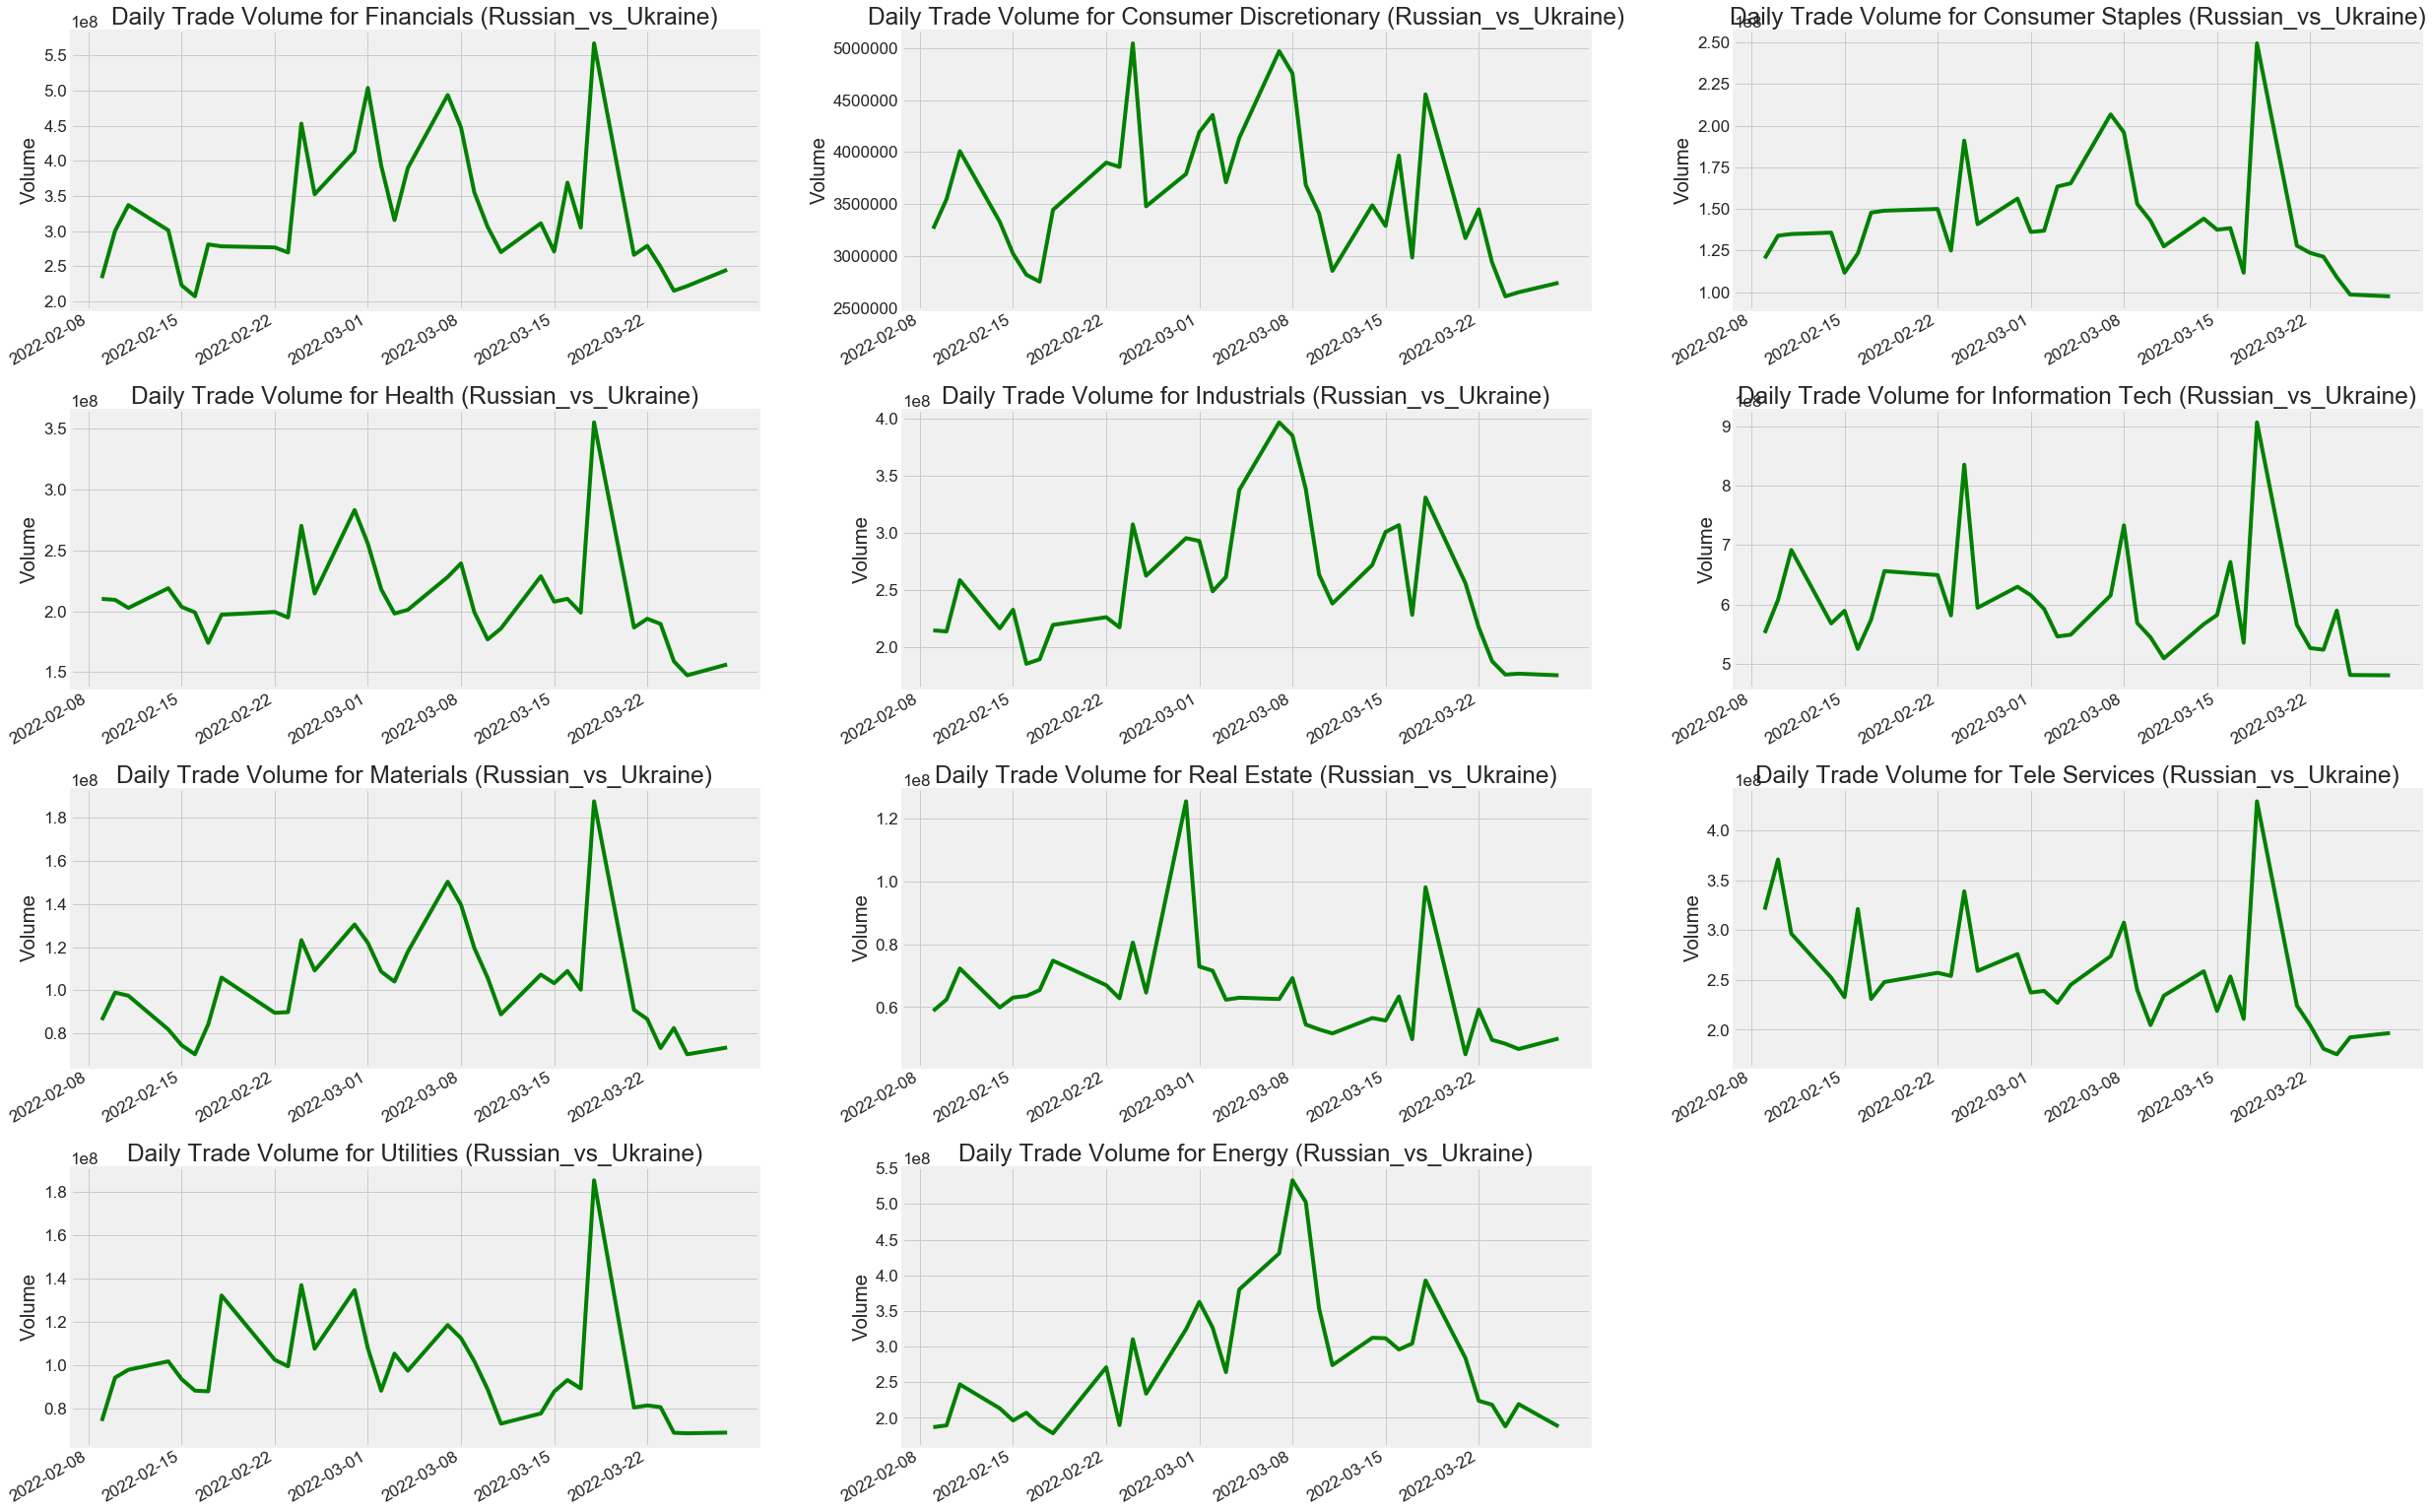

In [6]:
# Set layout for the plot
plt.figure(figsize=(35, 21.63))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.rc('font', size=17)  

# Create a subplots
for i, sector in enumerate(sector_list, 1):
    plt.subplot(4, 3, i)
    prerformance[i-1]['Volume'].plot(color="g")

    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Daily Trade Volume for {sector_name[i - 1]} ({Period})")
plt.tight_layout()
plt.savefig(f"Daily Trade Volume by Sectors ({Period}).png")

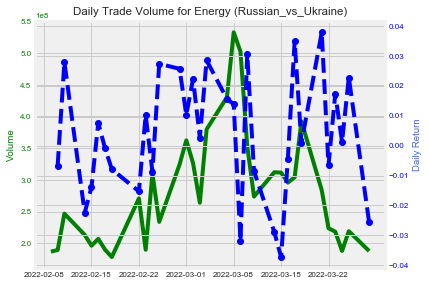

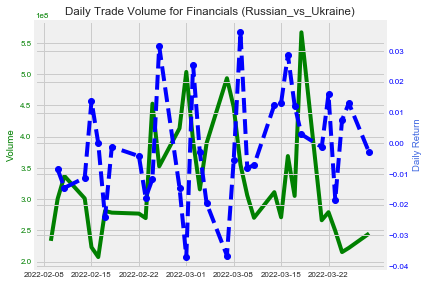

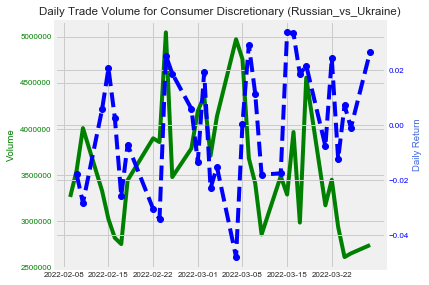

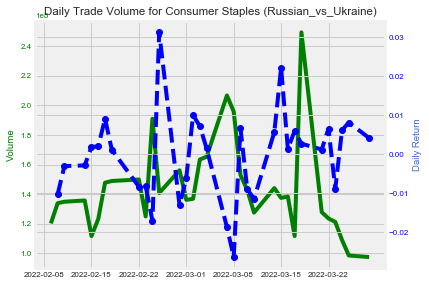

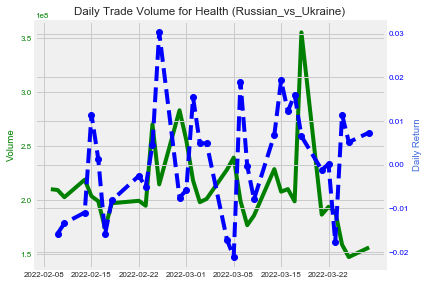

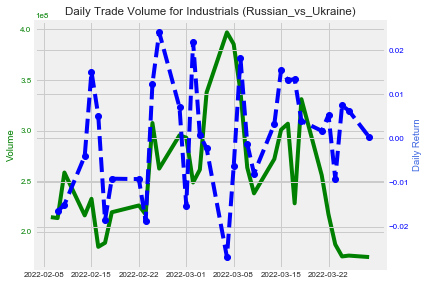

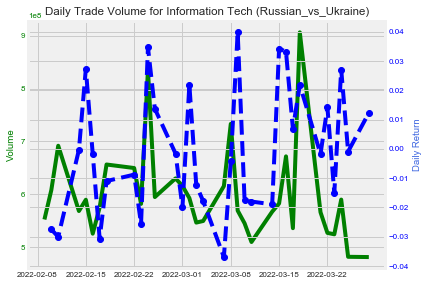

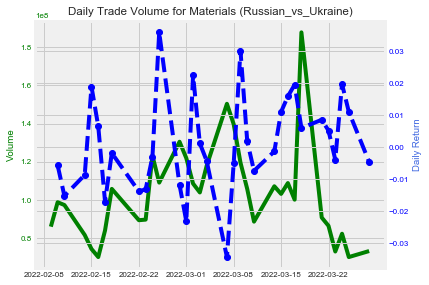

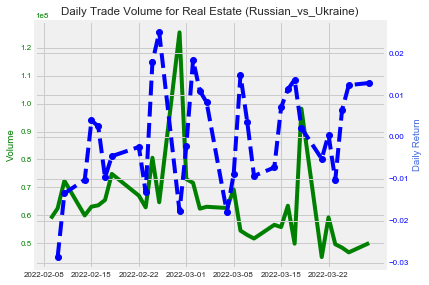

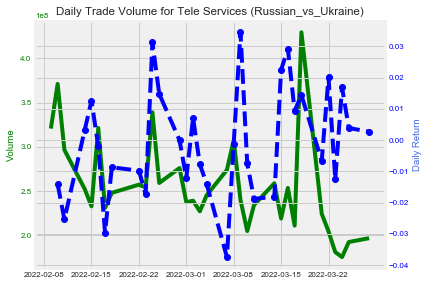

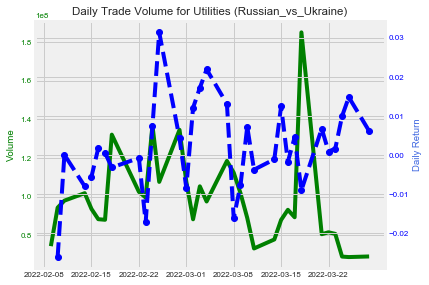

In [7]:
# Create two dataset for plot
for i in range(11):
    data_1 = prerformance[i-1]['Volume']
    data_2 = prerformance[i-1]['Adj Close'].pct_change()

    # set up layout and create plot for dataset 1
    plt.rc('font', size=8)  
    fig, ax1 = plt.subplots() 
    ax1.set_ylabel('Volume', color = 'g')
    ax1.plot(data_1.index, data_1, color = 'g') 
    ax1.tick_params(axis ='y', labelcolor = 'g') 
  
    # Adding Twin Axes
    # set up layout and create plot for dataset 2
    ax2 = ax1.twinx()
    ax2.set_ylabel('Daily Return', color = 'royalblue') 
    ax2.plot(data_2.index, data_2, color = 'b', linestyle='--', marker='o') 
    ax2.tick_params(axis ='y', labelcolor = 'b') 
    
    plt.title(f"Daily Trade Volume for {sector_name[i-1]} ({Period})")
    plt.tight_layout()

    plt.savefig(f"Daily Trade Volume for {sector_name[i-1]} ({Period}).png")



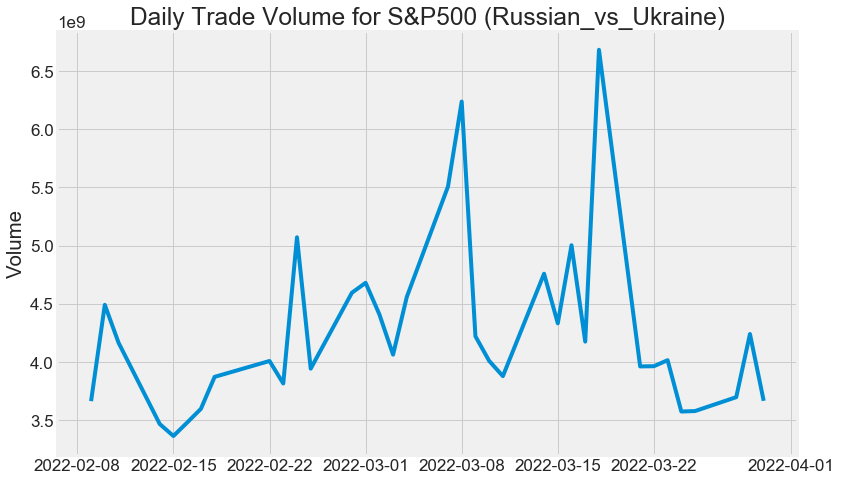

In [8]:
# Get 'Volume' on total S&P 500 from yahoo finance
SP500_df_volume = pd.DataFrame(DataReader('^GSPC', 'yahoo', start_date, end_date)['Volume'])

# Set layout for the plot & reate a plot
plt.figure(figsize=(12, 7))
plt.rc('font', size=17)  
plt.plot(SP500_df.index,SP500_df_volume['Volume'])
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Daily Trade Volume for S&P500 ({Period})")
plt.tight_layout()
plt.savefig(f"Daily Trade Volume for S&P500 ({Period}).png")   

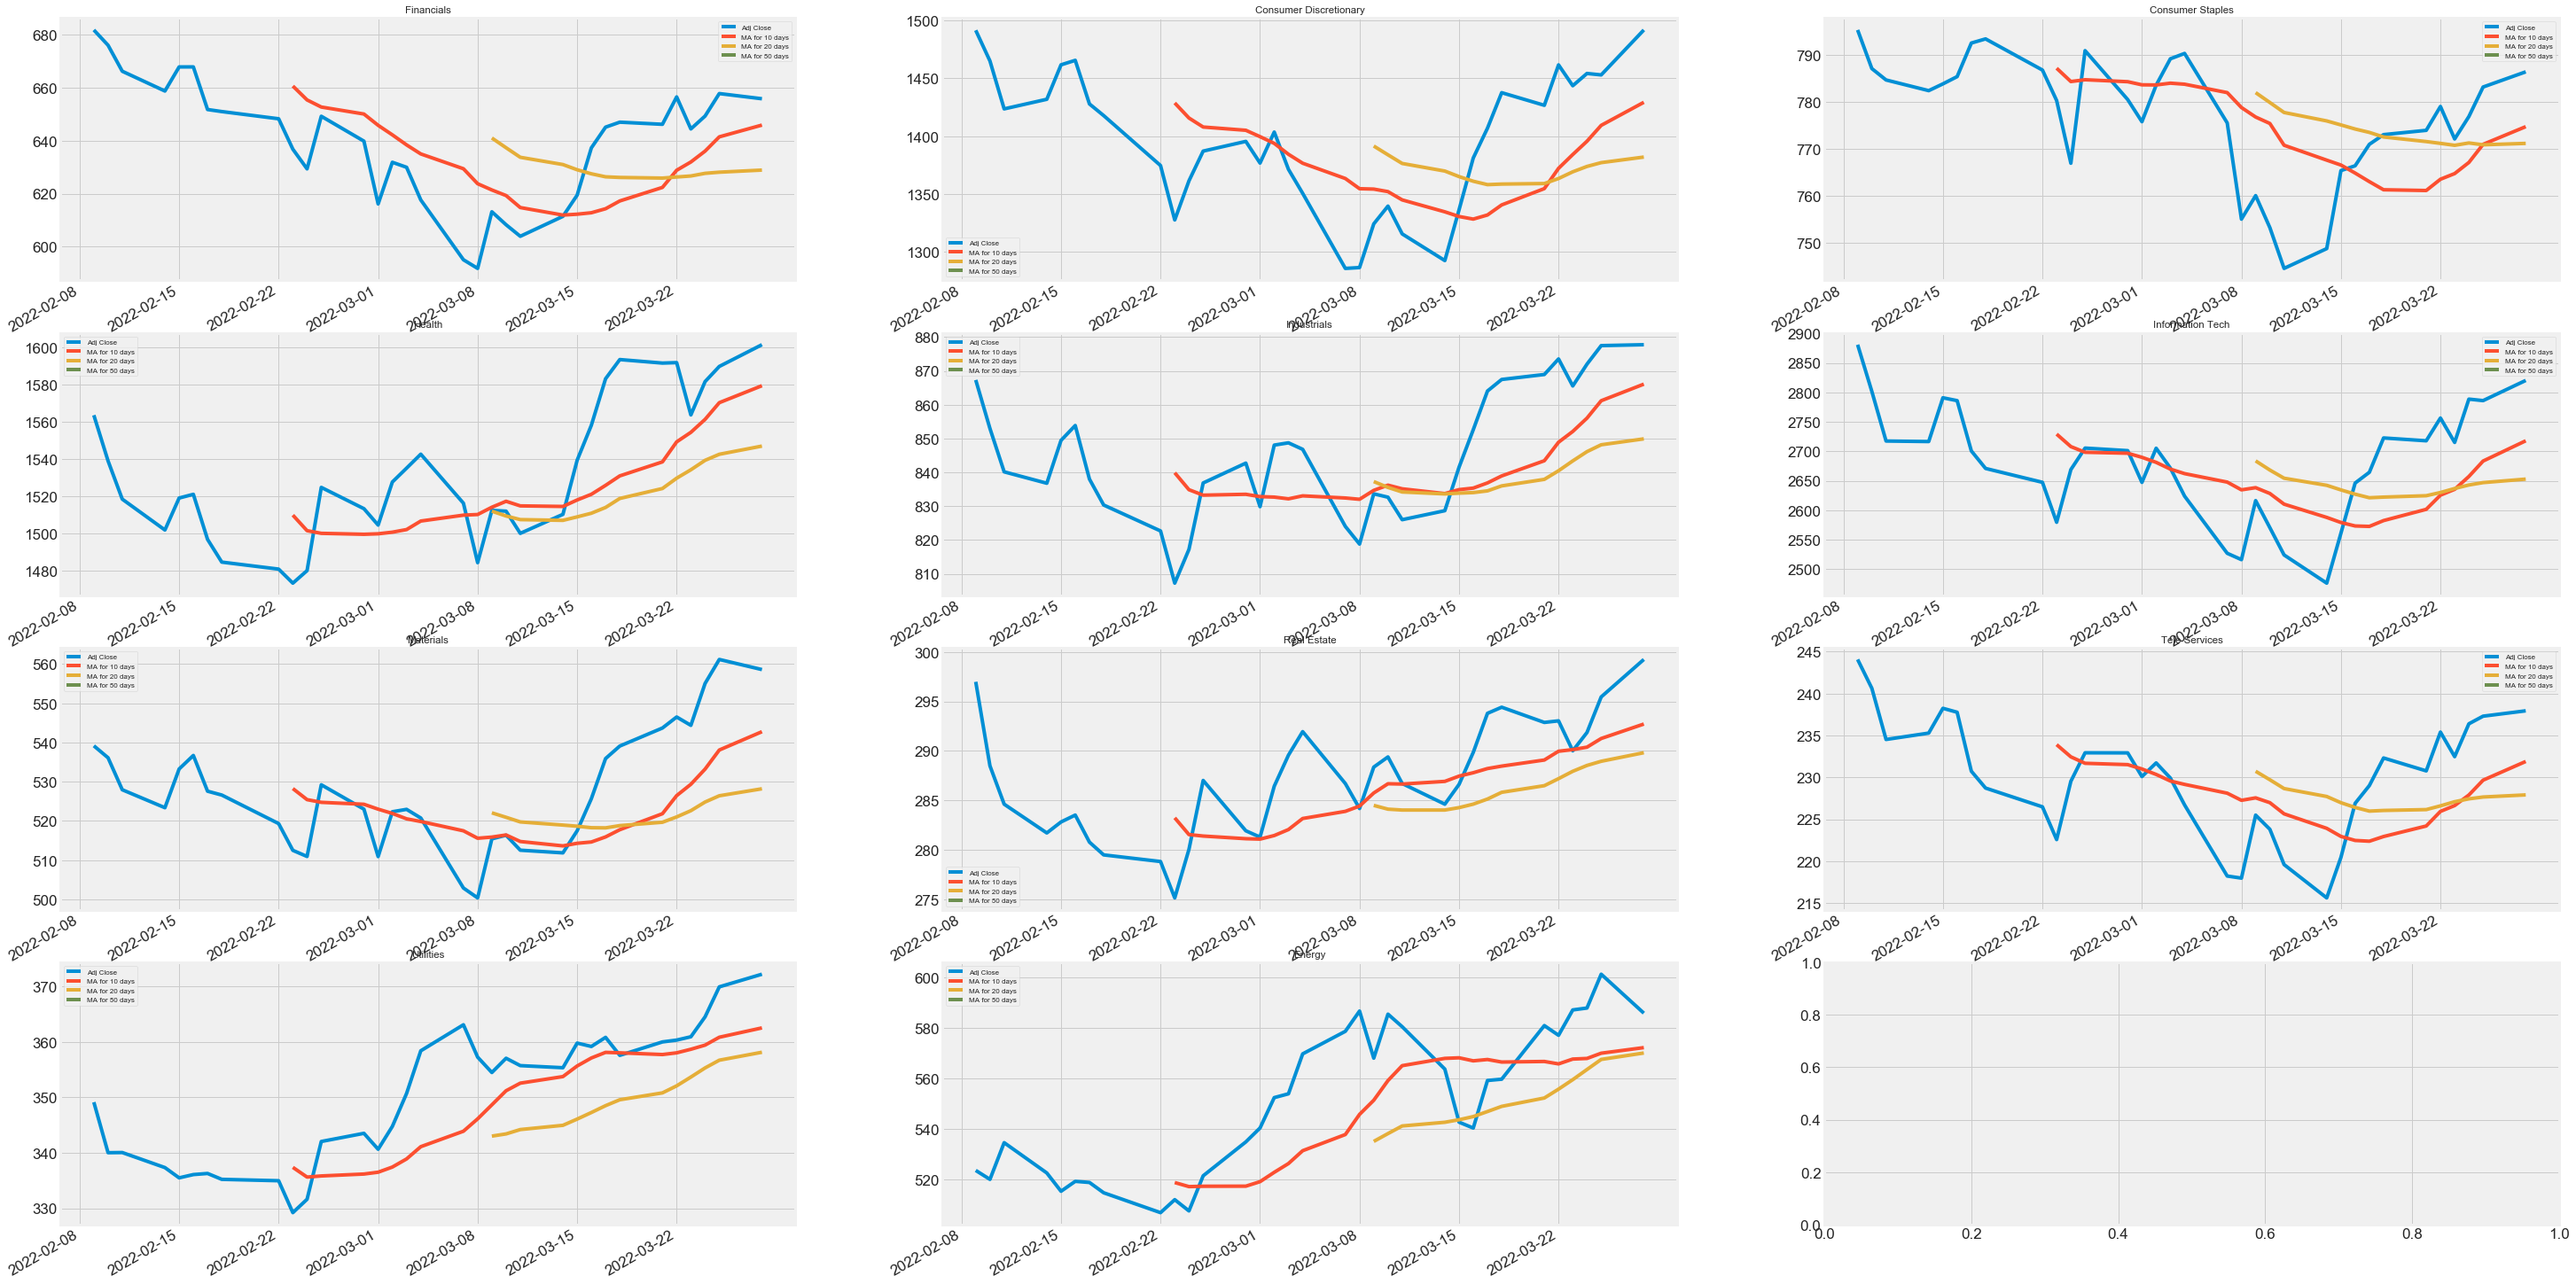

In [9]:
# inset 3 moving average data into the prerformance
ma_day = [10, 20, 50]
for ma in ma_day:
    for i, sector in enumerate(sector_list, 1):
        column_name = f"MA for {ma} days"
        prerformance[i-1][column_name] = prerformance[i-1]['Adj Close'].rolling(ma).mean()

# Create a subplots
fig, axes = plt.subplots(nrows=4, ncols=3)
plt.rc('font', size=8) 
fig.set_figheight(27.81)
fig.set_figwidth(45)
prerformance[0][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_xlabel(None)
axes[0,0].set_title(f'{sector_name[0]}')
prerformance[1][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_xlabel(None)
axes[0,1].set_title(f'{sector_name[1]}')
prerformance[2][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_xlabel(None)
axes[0,2].set_title(f'{sector_name[2]}')
prerformance[3][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_xlabel(None)
axes[1,0].set_title(f'{sector_name[3]}')
prerformance[4][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_xlabel(None)
axes[1,1].set_title(f'{sector_name[4]}')
prerformance[5][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_xlabel(None)
axes[1,2].set_title(f'{sector_name[5]}')
prerformance[6][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_xlabel(None)
axes[2,0].set_title(f'{sector_name[6]}')
prerformance[7][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_xlabel(None)
axes[2,1].set_title(f'{sector_name[7]}')
prerformance[8][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,2])
axes[2,2].set_xlabel(None)
axes[2,2].set_title(f'{sector_name[8]}')
prerformance[9][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_xlabel(None)
axes[3,0].set_title(f'{sector_name[9]}')
prerformance[10][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,1])
axes[3,1].set_xlabel(None)
axes[3,1].set_title(f'{sector_name[10]}')
plt.savefig(f"MA by Sectors ({Period}).png")        


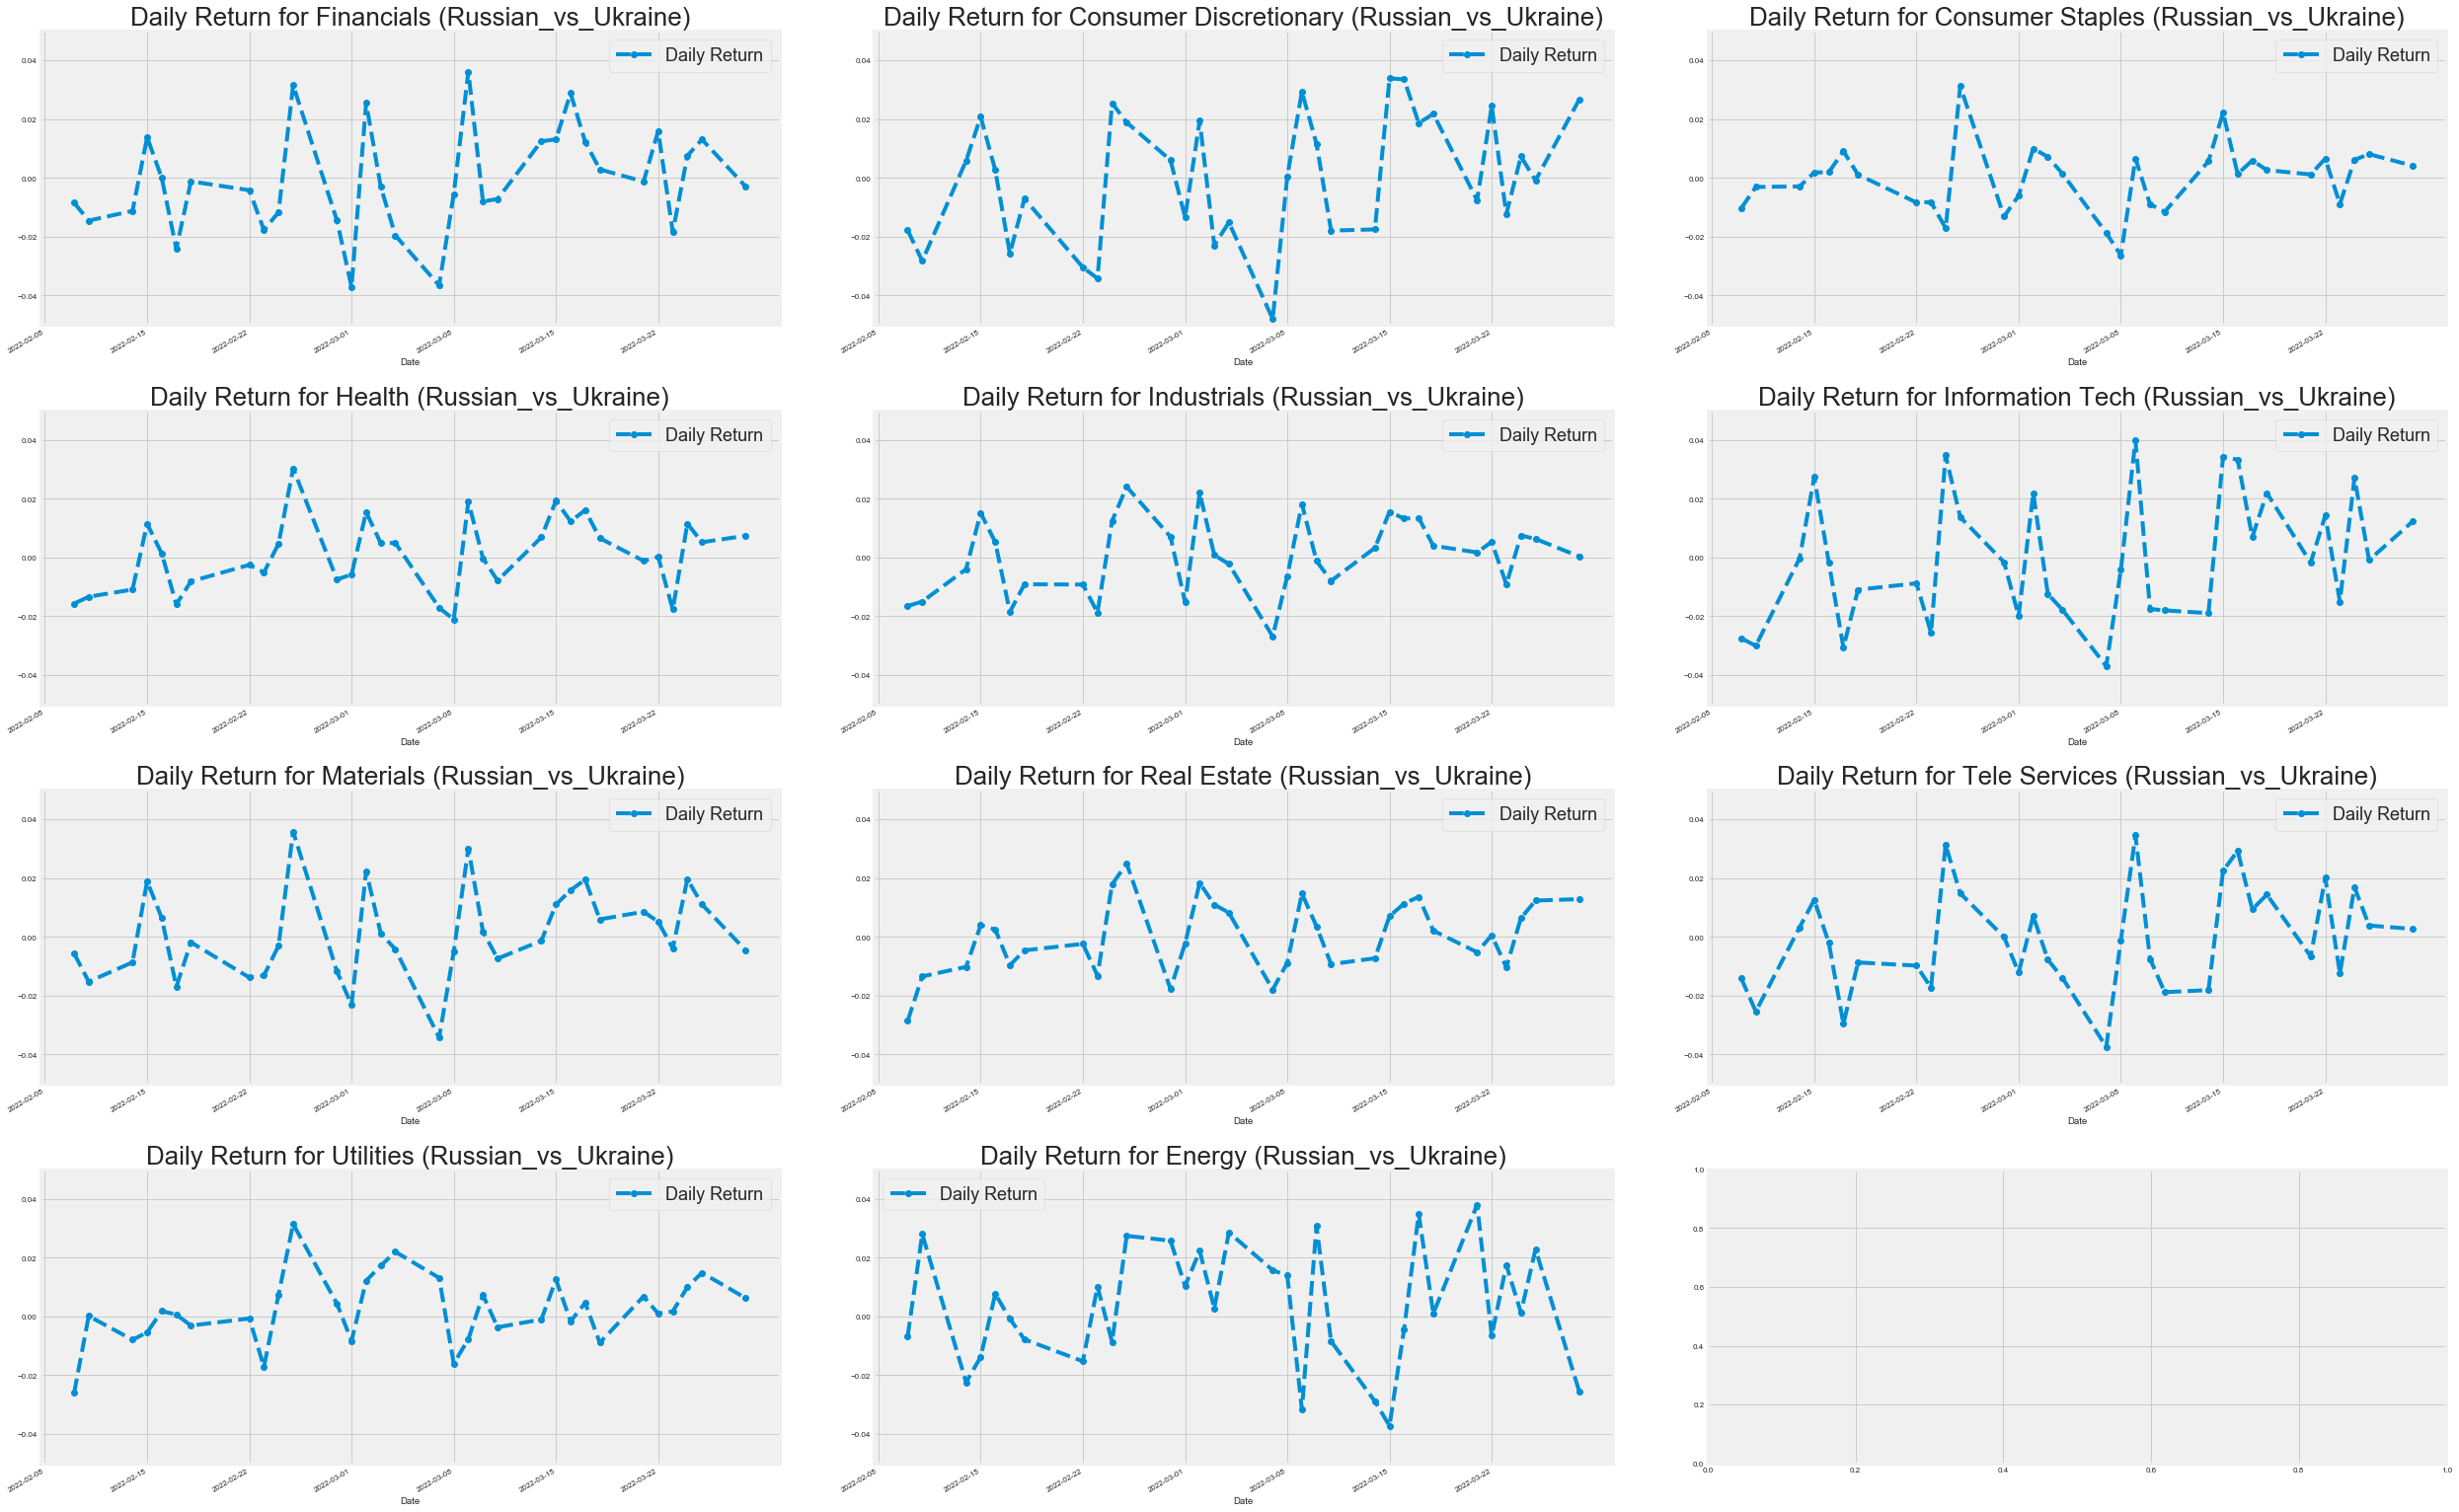

In [10]:
# calculate the daily return for each sector
for i, sector in enumerate(sector_list, 1):
    prerformance[i-1]['Daily Return'] = prerformance[i-1]['Adj Close'].pct_change()

# Create a subplots
fig, axes = plt.subplots(nrows=4, ncols=3)
plt.rc('font', size=18) 
fig.set_figheight(21.63)
fig.set_figwidth(35)
plt.xlabel(None)
prerformance[0]['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title(f'Daily Return for {sector_name[0]} ({Period})')
# plt.rc('font', size=18) 
axes[0,0].set_ylim([-0.05,0.05])
prerformance[1]['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title(f'Daily Return for {sector_name[1]} ({Period})')
axes[0,1].set_ylim([-0.05,0.05])
prerformance[2]['Daily Return'].plot(ax=axes[0,2], legend=True, linestyle='--', marker='o')
axes[0,2].set_title(f'Daily Return for {sector_name[2]} ({Period})')
axes[0,2].set_ylim([-0.05,0.05])
prerformance[3]['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title(f'Daily Return for {sector_name[3]} ({Period})')
axes[1,0].set_ylim([-0.05,0.05])
prerformance[4]['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title(f'Daily Return for {sector_name[4]} ({Period})')
axes[1,1].set_ylim([-0.05,0.05])
prerformance[5]['Daily Return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title(f'Daily Return for {sector_name[5]} ({Period})')
axes[1,2].set_ylim([-0.05,0.05])
prerformance[6]['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title(f'Daily Return for {sector_name[6]} ({Period})')
axes[2,0].set_ylim([-0.05,0.05])
prerformance[7]['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title(f'Daily Return for {sector_name[7]} ({Period})')
axes[2,1].set_ylim([-0.05,0.05])
prerformance[8]['Daily Return'].plot(ax=axes[2,2], legend=True, linestyle='--', marker='o')
axes[2,2].set_title(f'Daily Return for {sector_name[8]} ({Period})')
axes[2,2].set_ylim([-0.05,0.05])
prerformance[9]['Daily Return'].plot(ax=axes[3,0], legend=True, linestyle='--', marker='o')
axes[3,0].set_title(f'Daily Return for {sector_name[9]} ({Period})')
axes[3,0].set_ylim([-0.05,0.05])
prerformance[10]['Daily Return'].plot(ax=axes[3,1], legend=True, linestyle='--', marker='o')
axes[3,1].set_title(f'Daily Return for {sector_name[10]} ({Period})')
axes[3,1].set_ylim([-0.05,0.05])
fig.tight_layout()
plt.savefig(f"Daily Return by Sectors ({Period}).png")        


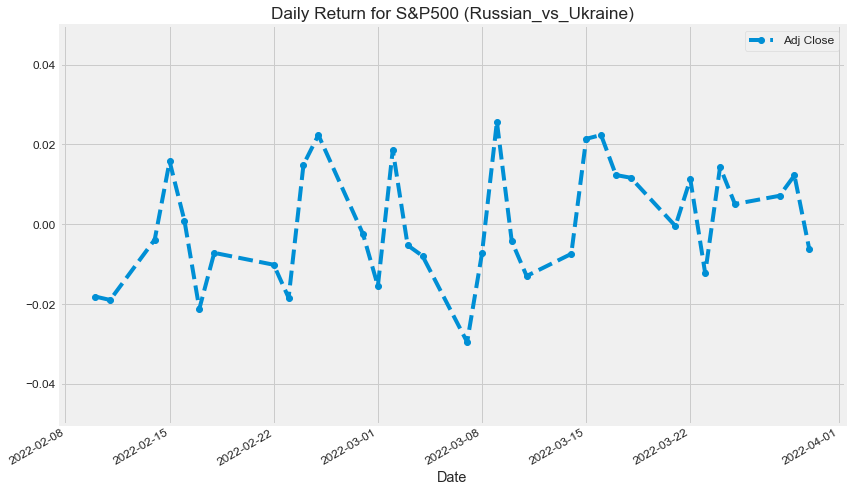

In [15]:
plt.figure(figsize=(12, 7))
plt.rc('font', size=12) 
SP500_df['Adj Close'].pct_change().plot( legend=True, linestyle='--', marker='o')
plt.ylabel(None)
plt.title(f"Daily Return for S&P500 ({Period})")
plt.ylim([-0.05,0.05])
plt.tight_layout()
plt.savefig(f"Daily Return for S&P500 ({Period}).png")    

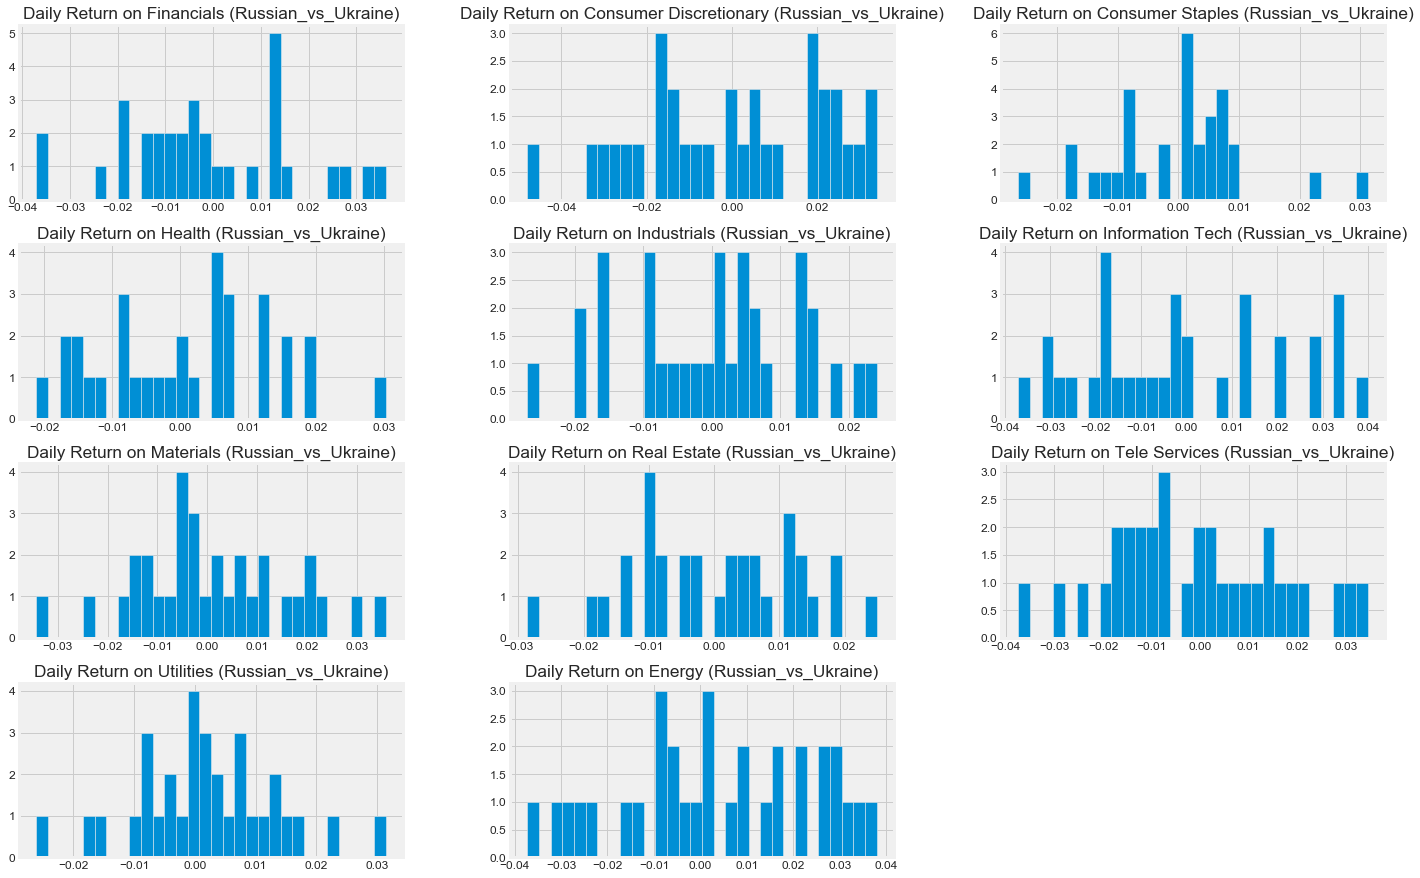

In [16]:
plt.figure(figsize=(20, 12.36))
plt.rc('font', size=12) 
for i, sector in enumerate(sector_list, 1):
    plt.subplot(4, 3, i)
    prerformance[i-1]['Daily Return'].hist(bins=30)
    plt.ylabel(None)
    plt.xlabel(f'')
    plt.title(f'Daily Return on {sector_name[i - 1]} ({Period})')   
plt.tight_layout()
plt.savefig(f"Daily Return by Sectors ({Period}) - histogram.png")    

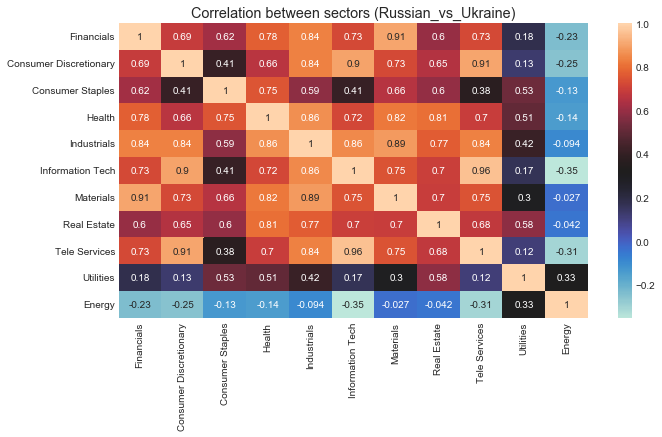

In [17]:
# get return for each sectors, create a new DataFrame
closing_df = DataReader(sector_list, 'yahoo', start_date, end_date)['Adj Close']
sector_rate = closing_df.pct_change()

# Rename column name
sector_rate.rename(columns={'^SP500-40':"Financials",'^SP500-25':"Consumer Discretionary",
                            '^SP500-30':"Consumer Staples","^SP500-35":"Health","^SP500-20":"Industrials",
                            "^SP500-45":"Information Tech","^SP500-15":"Materials","^SP500-60":"Real Estate",
                            "^SP500-50":"Tele Services","^SP500-55":"Utilities","^GSPE":"Energy"}, inplace=True)

# create plot
plt.figure(figsize=(10,6.18))
plt.rc('font', size=10) 
sns.heatmap(sector_rate.corr(), annot=True, cmap='icefire')
plt.xlabel(None)
plt.ylabel(None)
plt.title(f'Correlation between sectors ({Period})')   
plt.tight_layout()
plt.savefig(f"Correlation by Sectors ({Period}).png")


<Figure size 2880x1779.84 with 0 Axes>

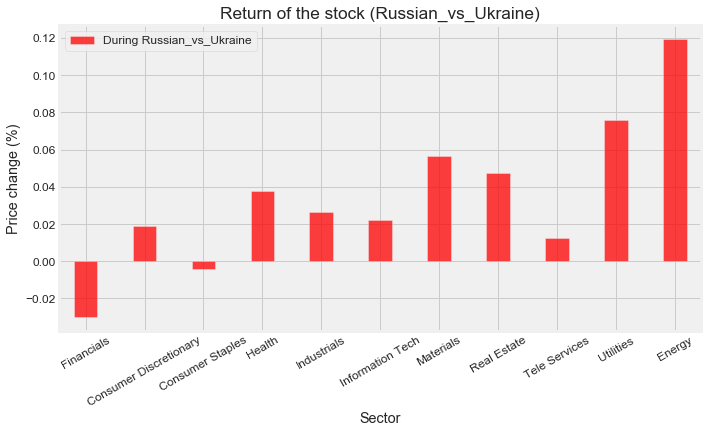

In [20]:
# Get Adj Close price on period start date and end date
closing_end = DataReader(sector_list, 'yahoo', end_date, end_date)['Adj Close']
opening_start = DataReader(sector_list, 'yahoo', start_date, start_date)['Open']

# do the calculation and create a period return list
period_return_list=[]
for q in sector_list:
    period_return_list.append((closing_end.loc[closing_end.index.min(),q]-opening_start.loc[opening_start.index.min(),q])/opening_start.loc[opening_start.index.min(),q])

# Create a DataFrame and insert the period_return_list
period_return_df = pd.DataFrame({f'During {Period}': period_return_list})
period_return_df.index = sector_name

# Create the plot
plt.figure(figsize=(40,24.72))
plt.rc('font', size=12)
period_return_df.plot(kind="bar",color= 'r', alpha=0.75, align="center",width=0.4,figsize=(10, 6.18))
plt.xticks(rotation=30)

# Set appearance
plt.title(f"Return of the stock ({Period})")
plt.xlabel("Sector")
plt.ylabel("Price change (%)")
plt.tight_layout()
plt.savefig(f"Return of the stock ({Period}).png")        

The pearson correlation coefficient is: 0.6913787361609807
The p-value is: 5.968938851070376e-06


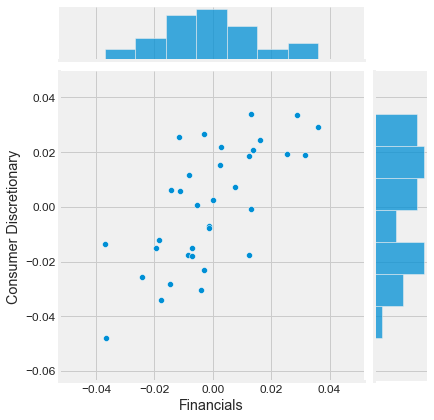

In [21]:
import scipy
from scipy import stats

# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(sector_list, 'yahoo', start_date, end_date)['Adj Close']
sector_rets = closing_df.pct_change().dropna()
sector_rets.rename(columns={'^GSPC':"S&P500",'^SP500-40':"Financials",'^SP500-25':"Consumer Discretionary",
                            '^SP500-30':"Consumer Staples","^SP500-35":"Health","^SP500-20":"Industrials",
                            "^SP500-45":"Information Tech","^SP500-15":"Materials","^SP500-60":"Real Estate",
                            "^SP500-50":"Tele Services","^SP500-55":"Utilities","^GSPE":"Energy"}, inplace=True)

p = sns.jointplot( data=sector_rets, x = "Financials", y='Consumer Discretionary',kind='scatter')
r, p = scipy.stats.pearsonr(sector_rets["Financials"], sector_rets['Consumer Discretionary'])
print("The pearson correlation coefficient is:", r)
print("The p-value is:", p)

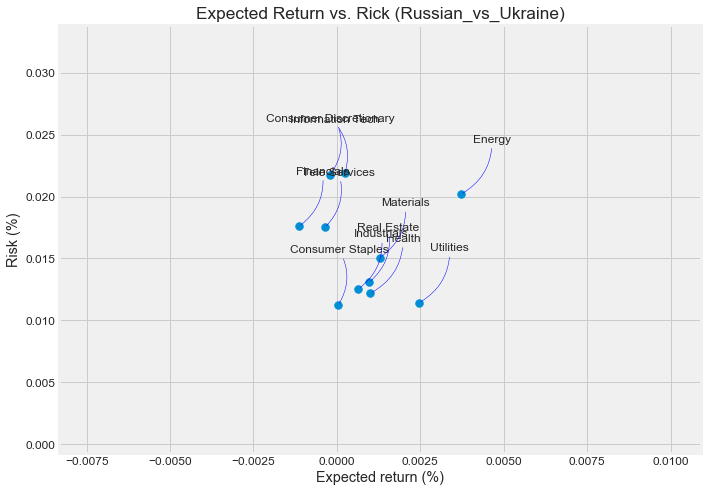

In [22]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = sector_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
# plt.xlim(-0.0013,-0.0002)
# plt.ylim(0.02,0.06)
plt.xlabel('Expected return (%)')
plt.ylabel('Risk (%)')
# plt.xlabel(None)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.title(f"Expected Return vs. Rick ({Period})")
plt.tight_layout()
plt.savefig(f"Expected Return vs. Rick ({Period}).png")  

In [23]:
rets['Consumer Staples'].quantile(0.05)

-0.017645337163384477

In [24]:
rets['Energy'].quantile(0.05)

-0.029912176461478483

In [25]:
rets['Financials'].quantile(0.05)

-0.02846973689939821